In [1]:
#necessary imports

import GPy
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import plotly.offline as py
#GPy.plotting.change_plotting_library('plotly')

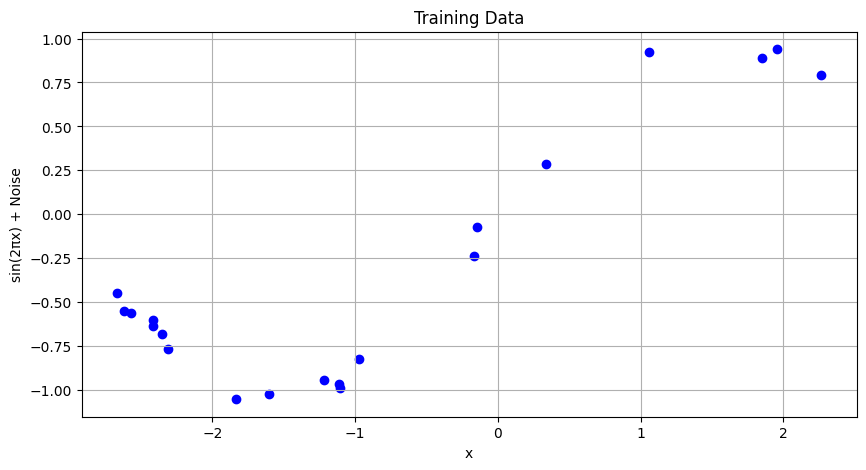

In [2]:
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05

# Plotting the data
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color='blue')
plt.title('Training Data')
plt.xlabel('x')
plt.ylabel('sin(2πx) + Noise')
plt.grid(True)
plt.show()

In [3]:
#Covariance Kernel

kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

print(kernel)

  rbf.         |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        


In [4]:
m  = GPy.models.GPRegression(X, Y, kernel)
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


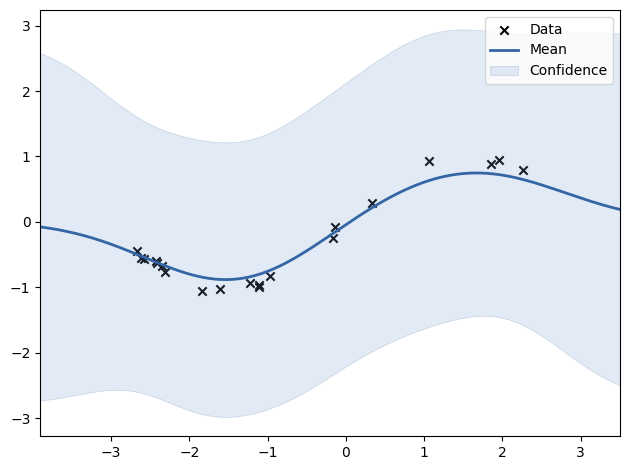

In [6]:
#show the model before optimization of parameters 
fig = m.plot()
plt.show()
#GPy.plotting.show(fig, filename='basic_gp_regression_notebook')

In [7]:
m.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s02  0005  -1.054647e+01   3.413445e+01 
    00s04  0012  -1.611408e+01   4.612697e-02 
    00s05  0014  -1.613748e+01   3.266380e-02 
    00s08  0018  -1.614052e+01   2.109846e-10 
    00s08  0019  -1.614052e+01   2.109846e-10 
Runtime:     00s08
Optimization status: Converged



In [8]:
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = -16.140518924846486
Optimization restart 2/10, f = -16.14051892483986
Optimization restart 3/10, f = -16.140518924593813
Optimization restart 4/10, f = -16.140518924817734
Optimization restart 5/10, f = -16.140518924848443
Optimization restart 6/10, f = -16.140518924809662
Optimization restart 7/10, f = -16.14051892483601
Optimization restart 8/10, f = -16.14051892481166
Optimization restart 9/10, f = -16.140518924846987
Optimization restart 10/10, f = -16.14051892484826


GP_regression.,value,constraints,priors
rbf.variance,0.7478920497179677,+ve,
rbf.lengthscale,1.7293156778760228,+ve,
Gaussian_noise.variance,0.002757671061140243,+ve,


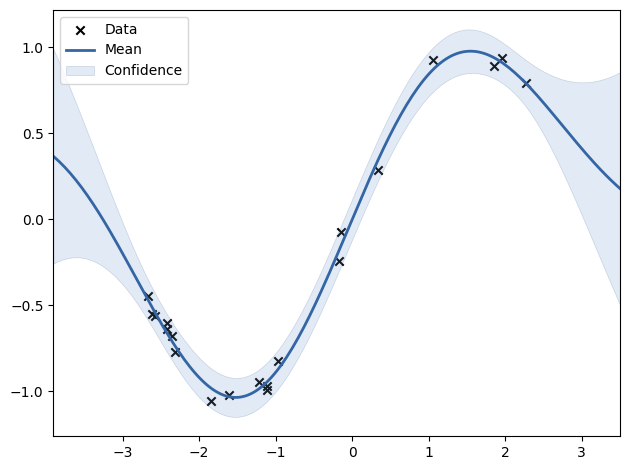

In [9]:
display(m)
fig = m.plot()